## Reto 6: Lo que los científicos aman

### 1. Objetivos:
    - Practicar las siguientes herramientas:
        - Lectura de .csv
        - `merge`
        - Filtros con value_counts()
        - Agrupaciones y reordenamientos
    
---
    
### 2. Desarrollo:

#### a) Lo que los científicos aman

En este Reto vamos a obtener una lista de las películas que fueron mejor evaluadas por científicos para saber cuáles son sus favoritas. Vamos a realizar los siguientes pasos:

1. Lee los archivos para `movies`, `ratings` y `users`.
2. Agrega **solamente** la columna `occupation` al `DataFrame` `ratings`, para tener la información de las ocupaciones de los usuarios que realizaron los ratings.
3. Filtra tu tabla `ratings` para quedarte solamente con los ratings hechos por científicos.
4. Agrega **solamente** la columna `title` de la tabla `movies` a la tabla `ratings` para tener la información de los nombres de las películas que fueron evaluadas por científicos.
5. Filtra tu `DataFrame` para quedarte **solamente** con las películas que fueron evaluadas más de 50 veces.
6. Realiza una agrupación por película y computa el promedio de los ratings de cada película.
7. Ordena la `Serie` resultante descendentemente y asígnala  a la variable `mean_of_scientists_ratings_sorted`.

> **Nota**: el paso #5 es un poco complejo. No te desesperes si no encuentras una solución rápidamente. ¡Pídele a la experta que te guíe para que puedas resolverlo sin que te explote la cabeza!

In [84]:
import pandas as pd
import numpy as np

In [85]:
movies = pd.read_csv('../data/movies.csv', sep='|')
ratings = pd.read_csv('../data/ratings.csv', sep='|')
users = pd.read_csv('../data/users.csv', sep='|')

In [86]:
# merge users but only add
ratings = ratings.merge(users[["user_id","occupation"]], on='user_id', how='left')
ratings["occupation_id"] = ratings["occupation"]
ratings = ratings.drop(columns=["occupation"])

In [87]:
scientist_id=15
ratings = ratings[ratings["occupation_id"] == scientist_id]

In [88]:
ratings = ratings.merge(movies[["movie_id","title"]], on="movie_id")
ratings.head()

,user_id,movie_id,rating,timestamp,occupation_id,title
0,3,3421,4,978298147,15,Animal House (1978)
1,193,3421,4,977019997,15,Animal House (1978)
2,412,3421,5,976294231,15,Animal House (1978)
3,929,3421,5,975192861,15,Animal House (1978)
4,1116,3421,3,974913876,15,Animal House (1978)


In [89]:
ratings_count = ratings.groupby('movie_id').count().reset_index()
ratings_count = ratings_count[['movie_id', 'rating']]
ratings_count.columns = ['movie_id', 'count']
ratings_count.head()

,movie_id,count
0,1,55
1,2,19
2,3,9
3,4,2
4,5,2


In [90]:
ratings = ratings.merge(ratings_count, on='movie_id', how='left')
ratings.head(10)

,user_id,movie_id,rating,timestamp,occupation_id,title,count
0,3,3421,4,978298147,15,Animal House (1978),34
1,193,3421,4,977019997,15,Animal House (1978),34
2,412,3421,5,976294231,15,Animal House (1978),34
3,929,3421,5,975192861,15,Animal House (1978),34
4,1116,3421,3,974913876,15,Animal House (1978),34
5,1243,3421,4,994719548,15,Animal House (1978),34
6,1528,3421,3,974745653,15,Animal House (1978),34
7,1930,3421,4,982435174,15,Animal House (1978),34
8,2501,3421,3,974085086,15,Animal House (1978),34
9,2585,3421,2,973876597,15,Animal House (1978),34


In [91]:
ratings = ratings[ratings['count']>50].sort_values(by='count', ascending=False)
# group by id and get the mean of the rating
ratings_mean = ratings.groupby('movie_id')['rating'].mean().sort_values(ascending=False)
ratings = pd.merge(ratings_mean, movies, on='movie_id')
mean_of_scientists_ratings_sorted = ratings.sort_values(by='rating', ascending=False)


In [92]:
mean_of_scientists_ratings_sorted

,movie_id,rating,title,genres
0,1136,4.653846,Monty Python and the Holy Grail (1974),Comedy
1,527,4.648148,Schindler's List (1993),Drama|War
2,260,4.600000,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi
3,541,4.568966,Blade Runner (1982),Film-Noir|Sci-Fi
4,318,4.537037,"Shawshank Redemption, The (1994)",Drama
5,1198,4.533333,Raiders of the Lost Ark (1981),Action|Adventure
6,858,4.530303,"Godfather, The (1972)",Action|Crime|Drama
7,750,4.529412,Dr. Strangelove or: How I Learned to Stop Worr...,Sci-Fi|War
8,1197,4.520000,"Princess Bride, The (1987)",Action|Adventure|Comedy|Romance
9,593,4.426667,"Silence of the Lambs, The (1991)",Drama|Thriller


Pídele a tu experta la función de verificación `visualizar_lista` (encontrada en el archivo `helpers.py` de la carpeta donde se encuentra este Reto), pégala debajo y corre la celda para verificar tu resultado.

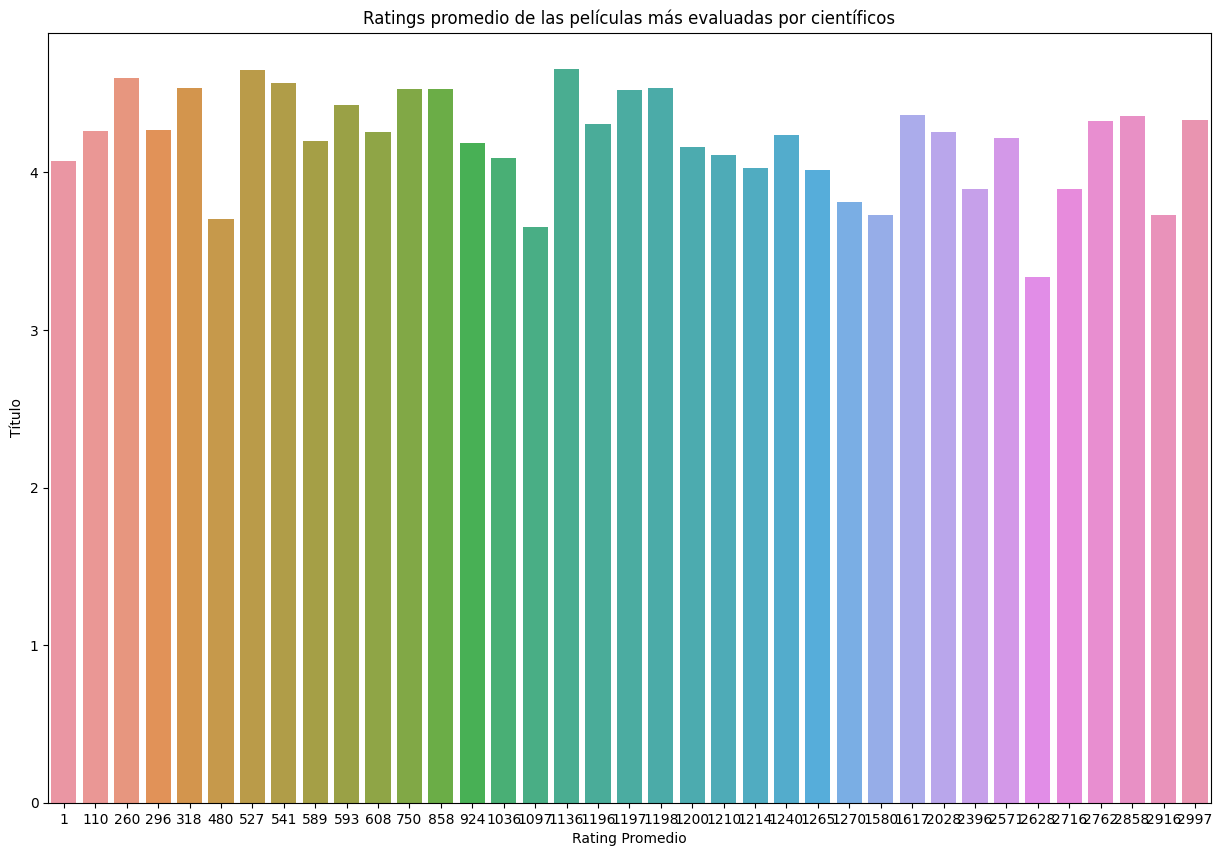

In [95]:
# Pega aquí la función de verificación 
def visualizar_lista(mean_of_scientists_ratings_sorted):
    import matplotlib.pyplot as plt
    import seaborn as sns

    fig, ax = plt.subplots(figsize=(15, 10))
    ax.set_title('Ratings promedio de las películas más evaluadas por científicos')
    sns.barplot(data=mean_of_scientists_ratings_sorted,x="movie_id",y="rating", ax=ax)
    ax.set(ylabel='Título', xlabel='Rating Promedio')

visualizar_lista(mean_of_scientists_ratings_sorted)